In [1]:
# Packages
import numpy as np # Numerical objects

import matplotlib.pyplot as plt # Plots and visualizations

# An option for visualizations directly on notebook
%matplotlib inline

# Functions:

In [2]:
# This is the model to be simulated. V is the size/volume of the system
# The default is the BirthDeath, which is a 1D model. Pay attention to correctly define higher dimensional models from this template
def BirthDeath(X, parameters, V):
    
    x = X[0][-1] # state of the model: population size
    
    b = parameters[0] # birth rate
    d = parameters[1] # death rate
    
    w1 = b*x # X -> 2X
    w2 = d*x # X -> 0

    
    reactions = [w1,w2] # Transition rates of reactions
    
    
    jumps = [ [1],[-1] ] # Possible jumps of states
    
    
    return reactions, jumps

In [3]:
###### Stochastic Simulation Algorithm
# model = the model that generates the system to simulate
# X = initial values as a list in the dimensions of the system (number of populations/species)
# parameters = list of parameters, same as used in the model
# T = stop time
# V = system's size/volume
### Outputs a list of trajectory arrays of all populations X and a reaction times array

def SSA(model,X,parameters,T,V):
    
    time = [0.]
    
    while time[-1]<T:
        
        reactions, jumps = model(X,parameters,V) # Reads the model, taking the reactions/rates and the jumps of state
        
        # Taking two random numbers in the interval [0,1]
        rand = np.random.rand(2) # Two choices for the algorithm: the time for the next reaction and which reaction is next
        
        # Build Sum and weights vectors: we are dividing the interval [0,1] according to the weight/propensity of each reaction
        Sum = 0.
        weights = [0.]
        for r in range(len(reactions)):
            weights.append(weights[-1]+reactions[r])
            Sum += reactions[r]
        
        del weights[0] # Removing zero and match indexes with reactions
        weights = np.array(weights)/Sum # "Weights" are actually levels based on weights
        
        
        # First choice: next-reaction time
        try: # Try/except to catch invalid states and stop the algorithm
            dt = -(1/Sum)*np.log(rand[0]) # we are dividing the interval [0,1] according to the weights of the exponential distribution of time
        except:                           # with rate equal to the sum of rates
            break
        time.append(time[-1]+dt)
        

        # Second choice: the jump!
        for r in range(len(weights)):
            if(rand[1]<weights[r]): # check where the choice falls to determine the jump
                for i in range(len(X)):
                    X[i].append(X[i][-1]+jumps[r][i])
                
                break; # break the search, because already jumped
                     
        
    # Generate the list of trajectories
    trajectory_list = []
    for i in range(len(X)):
        trajectory_list.append(np.array(X[i]))
    
    
    return trajectory_list, time

# Analysis:

In [52]:
# Initialize and set the model

V = 1

b = 0.5
d = 0.4

X0 = [[40]]
params = [b,d]
T = 20


# Call the simulation!
pop, time = SSA(BirthDeath,X0,params,T,V)

Text(0.5, 1.0, 'Stochastic Simulation')

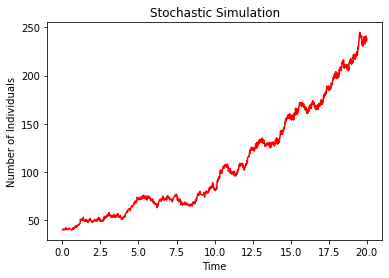

In [53]:
# Visualize the simulation

plt.plot(time,pop[0], c='red')


plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('Stochastic Simulation')

In [54]:
# Now a larger system

V2 = 100

X0 = [[4000]] # This is the large X0'



pop2, time2 = SSA(BirthDeath,X0,params,T,V)

Text(0.5, 1.0, 'Stochastic Simulation')

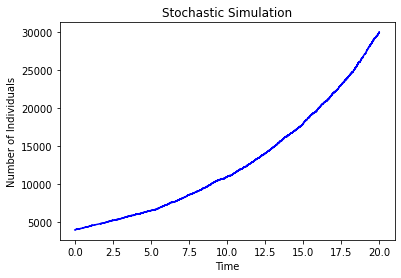

In [55]:
plt.plot(time2,pop2[0], c='blue')


plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('Stochastic Simulation')

Text(0.5, 1.0, 'Stochastic Simulation')

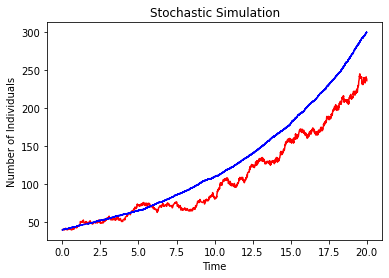

In [56]:
# Compare densities of small and large systems
# In order to compare the two, adjust the initial number of elements to match the densities!! X0/V = X0'/V2 => X0' = X0*V2/V

plt.plot(time,pop[0]/V, c='red')
plt.plot(time2,pop2[0]/V2, c='blue')


plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('Stochastic Simulation')